# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [8]:
client = MongoClient(mongod_connect)
db = client.gp5 # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [9]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [10]:
track = ['election'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [11]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

1323304991533240327
1323304991453491202
1323304991415742466
1323304991424188422
1323304991675863040
1323304991604486145
1323304991659036675
1323304991470325760
1323304991596032000
1323304991696846851
1323304991793303555
1323304991948333056
1323304991843639296
1323304991982051329
1323304991998824451
1323304992137240576
1323304992221134849
1323304992145625088
1323304992300769280
1323304992225153024
1323304992296431617
1323304992447614978
1323304992501977089
1323304992690888705
1323304992623779840
1323304992426598400
1323304992770502662
1323304992909021185
1323304992904806401
1323304992992841735
1323304993068376066
1323304992648953858
1323304993001263104
1323304993059794945
1323304993110319104
1323304993231790080
1323304993236070402
1323304993181630464
1323304993156464643
1323304993235951617
1323304993064054784
1323304993152225280
1323304993353584645
1323304993353461761
1323304993299062784
1323304993349345281
1323304993399709698
1323304993567338498
1323304993588420608
1323304993487790080


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [12]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [13]:
count = 100 #number of returned tweets, default and max is 100
geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "election"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [14]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Mon Nov 02 16:44:48 +0000 2020'
'Mon Nov 02 16:44:40 +0000 2020'
'Mon Nov 02 16:44:23 +0000 2020'
'Mon Nov 02 16:42:23 +0000 2020'
'Mon Nov 02 16:41:27 +0000 2020'
'Mon Nov 02 16:41:03 +0000 2020'
'Mon Nov 02 16:39:15 +0000 2020'
'Mon Nov 02 16:37:36 +0000 2020'
'Mon Nov 02 16:36:23 +0000 2020'
'Mon Nov 02 16:35:59 +0000 2020'
'Mon Nov 02 16:35:51 +0000 2020'
'Mon Nov 02 16:35:42 +0000 2020'
'Mon Nov 02 16:35:39 +0000 2020'
'Mon Nov 02 16:34:16 +0000 2020'
'Mon Nov 02 16:33:57 +0000 2020'
'Mon Nov 02 16:32:29 +0000 2020'
'Mon Nov 02 16:32:14 +0000 2020'
'Mon Nov 02 16:32:07 +0000 2020'
'Mon Nov 02 16:31:01 +0000 2020'
'Mon Nov 02 16:30:45 +0000 2020'
'Mon Nov 02 16:30:23 +0000 2020'
'Mon Nov 02 16:29:40 +0000 2020'
'Mon Nov 02 16:29:33 +0000 2020'
'Mon Nov 02 16:29:21 +0000 2020'
'Mon Nov 02 16:29:08 +0000 2020'
'Mon Nov 02 16:29:05 +0000 2020'
'Mon Nov 02 16:27:55 +0000 2020'
'Mon Nov 02 16:27:55 +0000 2020'
'Mon Nov 02 16:27:16 +0000 2020'
'Mon Nov 02 16:27:03 +0000 2020'
'Mon Nov 0

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [16]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Mon Nov 02 00:52:26 +0000 2020'
'Mon Nov 02 00:51:16 +0000 2020'
'Mon Nov 02 00:50:44 +0000 2020'
'Mon Nov 02 00:49:20 +0000 2020'
'Mon Nov 02 00:46:02 +0000 2020'
'Mon Nov 02 00:43:02 +0000 2020'
'Mon Nov 02 00:41:22 +0000 2020'
'Mon Nov 02 00:41:07 +0000 2020'
'Mon Nov 02 00:40:21 +0000 2020'
'Mon Nov 02 00:36:32 +0000 2020'
'Mon Nov 02 00:35:59 +0000 2020'
'Mon Nov 02 00:34:24 +0000 2020'
'Mon Nov 02 00:33:37 +0000 2020'
'Mon Nov 02 00:31:33 +0000 2020'
'Mon Nov 02 00:28:27 +0000 2020'
'Mon Nov 02 00:28:15 +0000 2020'
'Mon Nov 02 00:28:13 +0000 2020'
'Mon Nov 02 00:27:17 +0000 2020'
'Mon Nov 02 00:26:04 +0000 2020'
'Mon Nov 02 00:23:07 +0000 2020'
'Mon Nov 02 00:22:05 +0000 2020'
'Mon Nov 02 00:21:26 +0000 2020'
'Mon Nov 02 00:20:43 +0000 2020'
'Mon Nov 02 00:19:05 +0000 2020'
'Mon Nov 02 00:18:37 +0000 2020'
'Mon Nov 02 00:16:46 +0000 2020'
'Mon Nov 02 00:13:57 +0000 2020'
'Mon Nov 02 00:13:24 +0000 2020'
'Mon Nov 02 00:11:26 +0000 2020'
'Mon Nov 02 00:09:37 +0000 2020'
'Mon Nov 0

'Sun Nov 01 18:40:31 +0000 2020'
'Sun Nov 01 18:40:09 +0000 2020'
'Sun Nov 01 18:39:18 +0000 2020'
'Sun Nov 01 18:38:16 +0000 2020'
'Sun Nov 01 18:37:59 +0000 2020'
'Sun Nov 01 18:37:10 +0000 2020'
'Sun Nov 01 18:36:47 +0000 2020'
'Sun Nov 01 18:35:08 +0000 2020'
'Sun Nov 01 18:34:47 +0000 2020'
'Sun Nov 01 18:34:32 +0000 2020'
'Sun Nov 01 18:33:41 +0000 2020'
'Sun Nov 01 18:32:36 +0000 2020'
'Sun Nov 01 18:32:22 +0000 2020'
'Sun Nov 01 18:31:23 +0000 2020'
'Sun Nov 01 18:31:16 +0000 2020'
'Sun Nov 01 18:31:13 +0000 2020'
'Sun Nov 01 18:31:07 +0000 2020'
'Sun Nov 01 18:30:31 +0000 2020'
'Sun Nov 01 18:30:26 +0000 2020'
'Sun Nov 01 18:30:11 +0000 2020'
'Sun Nov 01 18:29:57 +0000 2020'
'Sun Nov 01 18:29:13 +0000 2020'
'Sun Nov 01 18:29:12 +0000 2020'
'Sun Nov 01 18:26:34 +0000 2020'
'Sun Nov 01 18:26:20 +0000 2020'
'Sun Nov 01 18:24:43 +0000 2020'
'Sun Nov 01 18:23:37 +0000 2020'
'Sun Nov 01 18:22:27 +0000 2020'
'Sun Nov 01 18:21:20 +0000 2020'
'Sun Nov 01 18:21:15 +0000 2020'
'Sun Nov 0

'Sun Nov 01 14:54:29 +0000 2020'
'Sun Nov 01 14:54:22 +0000 2020'
'Sun Nov 01 14:54:09 +0000 2020'
'Sun Nov 01 14:53:47 +0000 2020'
'Sun Nov 01 14:53:18 +0000 2020'
'Sun Nov 01 14:52:49 +0000 2020'
'Sun Nov 01 14:52:00 +0000 2020'
'Sun Nov 01 14:51:48 +0000 2020'
'Sun Nov 01 14:50:28 +0000 2020'
'Sun Nov 01 14:50:09 +0000 2020'
'Sun Nov 01 14:49:31 +0000 2020'
'Sun Nov 01 14:48:27 +0000 2020'
'Sun Nov 01 14:48:11 +0000 2020'
'Sun Nov 01 14:47:31 +0000 2020'
'Sun Nov 01 14:46:45 +0000 2020'
'Sun Nov 01 14:46:29 +0000 2020'
'Sun Nov 01 14:45:51 +0000 2020'
'Sun Nov 01 14:45:50 +0000 2020'
'Sun Nov 01 14:44:29 +0000 2020'
'Sun Nov 01 14:44:23 +0000 2020'
'Sun Nov 01 14:43:52 +0000 2020'
'Sun Nov 01 14:43:36 +0000 2020'
'Sun Nov 01 14:43:03 +0000 2020'
'Sun Nov 01 14:42:50 +0000 2020'
'Sun Nov 01 14:42:07 +0000 2020'
'Sun Nov 01 14:42:05 +0000 2020'
'Sun Nov 01 14:41:57 +0000 2020'
'Sun Nov 01 14:41:04 +0000 2020'
'Sun Nov 01 14:40:48 +0000 2020'
'Sun Nov 01 14:40:39 +0000 2020'
'Sun Nov 0

'Sun Nov 01 13:08:14 +0000 2020'
'Sun Nov 01 13:08:11 +0000 2020'
'Sun Nov 01 13:07:28 +0000 2020'
'Sun Nov 01 13:06:11 +0000 2020'
'Sun Nov 01 13:05:50 +0000 2020'
'Sun Nov 01 13:05:36 +0000 2020'
'Sun Nov 01 13:05:14 +0000 2020'
'Sun Nov 01 13:05:13 +0000 2020'
'Sun Nov 01 13:03:33 +0000 2020'
'Sun Nov 01 13:01:54 +0000 2020'
'Sun Nov 01 13:00:12 +0000 2020'
'Sun Nov 01 12:59:56 +0000 2020'
'Sun Nov 01 12:59:50 +0000 2020'
'Sun Nov 01 12:59:28 +0000 2020'
'Sun Nov 01 12:59:12 +0000 2020'
'Sun Nov 01 12:57:56 +0000 2020'
'Sun Nov 01 12:57:46 +0000 2020'
'Sun Nov 01 12:57:19 +0000 2020'
'Sun Nov 01 12:57:08 +0000 2020'
'Sun Nov 01 12:57:07 +0000 2020'
'Sun Nov 01 12:57:07 +0000 2020'
'Sun Nov 01 12:56:55 +0000 2020'
'Sun Nov 01 12:55:59 +0000 2020'
'Sun Nov 01 12:55:32 +0000 2020'
'Sun Nov 01 12:54:13 +0000 2020'
'Sun Nov 01 12:54:04 +0000 2020'
'Sun Nov 01 12:53:58 +0000 2020'
'Sun Nov 01 12:53:37 +0000 2020'
'Sun Nov 01 12:53:16 +0000 2020'
'Sun Nov 01 12:52:46 +0000 2020'
'Sun Nov 0

'Sun Nov 01 09:51:42 +0000 2020'
'Sun Nov 01 09:51:05 +0000 2020'
'Sun Nov 01 09:50:00 +0000 2020'
'Sun Nov 01 09:49:33 +0000 2020'
'Sun Nov 01 09:47:29 +0000 2020'
'Sun Nov 01 09:44:33 +0000 2020'
'Sun Nov 01 09:44:26 +0000 2020'
'Sun Nov 01 09:44:26 +0000 2020'
'Sun Nov 01 09:44:12 +0000 2020'
'Sun Nov 01 09:43:55 +0000 2020'
'Sun Nov 01 09:43:54 +0000 2020'
'Sun Nov 01 09:43:33 +0000 2020'
'Sun Nov 01 09:43:19 +0000 2020'
'Sun Nov 01 09:42:47 +0000 2020'
'Sun Nov 01 09:42:40 +0000 2020'
'Sun Nov 01 09:42:38 +0000 2020'
'Sun Nov 01 09:41:23 +0000 2020'
'Sun Nov 01 09:41:22 +0000 2020'
'Sun Nov 01 09:40:53 +0000 2020'
'Sun Nov 01 09:40:43 +0000 2020'
'Sun Nov 01 09:40:42 +0000 2020'
'Sun Nov 01 09:40:27 +0000 2020'
'Sun Nov 01 09:39:52 +0000 2020'
'Sun Nov 01 09:39:43 +0000 2020'
'Sun Nov 01 09:39:40 +0000 2020'
'Sun Nov 01 09:39:31 +0000 2020'
'Sun Nov 01 09:39:10 +0000 2020'
'Sun Nov 01 09:39:07 +0000 2020'
'Sun Nov 01 09:38:49 +0000 2020'
'Sun Nov 01 09:38:45 +0000 2020'
'Sun Nov 0

'Sun Nov 01 06:27:18 +0000 2020'
'Sun Nov 01 06:27:17 +0000 2020'
'Sun Nov 01 06:27:16 +0000 2020'
'Sun Nov 01 06:26:45 +0000 2020'
'Sun Nov 01 06:26:09 +0000 2020'
'Sun Nov 01 06:25:57 +0000 2020'
'Sun Nov 01 06:25:29 +0000 2020'
'Sun Nov 01 06:25:28 +0000 2020'
'Sun Nov 01 06:23:54 +0000 2020'
'Sun Nov 01 06:23:40 +0000 2020'
'Sun Nov 01 06:23:31 +0000 2020'
'Sun Nov 01 06:23:13 +0000 2020'
'Sun Nov 01 06:23:10 +0000 2020'
'Sun Nov 01 06:22:53 +0000 2020'
'Sun Nov 01 06:22:33 +0000 2020'
'Sun Nov 01 06:21:42 +0000 2020'
'Sun Nov 01 06:21:42 +0000 2020'
'Sun Nov 01 06:21:36 +0000 2020'
'Sun Nov 01 06:20:45 +0000 2020'
'Sun Nov 01 06:19:53 +0000 2020'
'Sun Nov 01 06:19:13 +0000 2020'
'Sun Nov 01 06:19:13 +0000 2020'
'Sun Nov 01 06:18:50 +0000 2020'
'Sun Nov 01 06:18:46 +0000 2020'
'Sun Nov 01 06:18:40 +0000 2020'
'Sun Nov 01 06:18:36 +0000 2020'
'Sun Nov 01 06:18:33 +0000 2020'
'Sun Nov 01 06:18:31 +0000 2020'
'Sun Nov 01 06:18:07 +0000 2020'
'Sun Nov 01 06:17:59 +0000 2020'
'Sun Nov 0

'Sun Nov 01 03:25:39 +0000 2020'
'Sun Nov 01 03:24:47 +0000 2020'
'Sun Nov 01 03:24:10 +0000 2020'
'Sun Nov 01 03:21:43 +0000 2020'
'Sun Nov 01 03:21:26 +0000 2020'
'Sun Nov 01 03:20:52 +0000 2020'
'Sun Nov 01 03:19:52 +0000 2020'
'Sun Nov 01 03:19:44 +0000 2020'
'Sun Nov 01 03:19:33 +0000 2020'
'Sun Nov 01 03:19:27 +0000 2020'
'Sun Nov 01 03:19:17 +0000 2020'
'Sun Nov 01 03:19:16 +0000 2020'
'Sun Nov 01 03:19:09 +0000 2020'
'Sun Nov 01 03:18:45 +0000 2020'
'Sun Nov 01 03:17:44 +0000 2020'
'Sun Nov 01 03:17:33 +0000 2020'
'Sun Nov 01 03:16:07 +0000 2020'
'Sun Nov 01 03:16:04 +0000 2020'
'Sun Nov 01 03:15:33 +0000 2020'
'Sun Nov 01 03:15:03 +0000 2020'
'Sun Nov 01 03:14:17 +0000 2020'
'Sun Nov 01 03:14:05 +0000 2020'
'Sun Nov 01 03:13:19 +0000 2020'
'Sun Nov 01 03:13:01 +0000 2020'
'Sun Nov 01 03:12:55 +0000 2020'
'Sun Nov 01 03:12:43 +0000 2020'
'Sun Nov 01 03:12:17 +0000 2020'
'Sun Nov 01 03:11:57 +0000 2020'
'Sun Nov 01 03:11:26 +0000 2020'
'Sun Nov 01 03:11:21 +0000 2020'
'Sun Nov 0

'Sun Nov 01 00:57:03 +0000 2020'
'Sun Nov 01 00:56:55 +0000 2020'
'Sun Nov 01 00:56:33 +0000 2020'
'Sun Nov 01 00:56:06 +0000 2020'
'Sun Nov 01 00:56:04 +0000 2020'
'Sun Nov 01 00:56:04 +0000 2020'
'Sun Nov 01 00:55:47 +0000 2020'
'Sun Nov 01 00:55:40 +0000 2020'
'Sun Nov 01 00:55:32 +0000 2020'
'Sun Nov 01 00:55:29 +0000 2020'
'Sun Nov 01 00:55:25 +0000 2020'
'Sun Nov 01 00:53:38 +0000 2020'
'Sun Nov 01 00:53:20 +0000 2020'
'Sun Nov 01 00:52:55 +0000 2020'
'Sun Nov 01 00:52:33 +0000 2020'
'Sun Nov 01 00:52:09 +0000 2020'
'Sun Nov 01 00:52:08 +0000 2020'
'Sun Nov 01 00:52:04 +0000 2020'
'Sun Nov 01 00:51:53 +0000 2020'
'Sun Nov 01 00:51:49 +0000 2020'
'Sun Nov 01 00:51:27 +0000 2020'
'Sun Nov 01 00:50:58 +0000 2020'
'Sun Nov 01 00:50:27 +0000 2020'
'Sun Nov 01 00:50:07 +0000 2020'
'Sun Nov 01 00:49:59 +0000 2020'
'Sun Nov 01 00:49:26 +0000 2020'
'Sun Nov 01 00:48:58 +0000 2020'
'Sun Nov 01 00:48:55 +0000 2020'
'Sun Nov 01 00:48:25 +0000 2020'
'Sun Nov 01 00:48:09 +0000 2020'
'Sun Nov 0

'Sat Oct 31 23:46:42 +0000 2020'
'Sat Oct 31 23:46:03 +0000 2020'
'Sat Oct 31 23:45:58 +0000 2020'
'Sat Oct 31 23:45:41 +0000 2020'
'Sat Oct 31 23:45:37 +0000 2020'
'Sat Oct 31 23:45:30 +0000 2020'
'Sat Oct 31 23:45:04 +0000 2020'
'Sat Oct 31 23:45:03 +0000 2020'
'Sat Oct 31 23:45:01 +0000 2020'
'Sat Oct 31 23:44:41 +0000 2020'
'Sat Oct 31 23:44:27 +0000 2020'
'Sat Oct 31 23:43:34 +0000 2020'
'Sat Oct 31 23:43:33 +0000 2020'
'Sat Oct 31 23:43:02 +0000 2020'
'Sat Oct 31 23:43:01 +0000 2020'
'Sat Oct 31 23:42:58 +0000 2020'
'Sat Oct 31 23:42:57 +0000 2020'
'Sat Oct 31 23:42:44 +0000 2020'
'Sat Oct 31 23:42:38 +0000 2020'
'Sat Oct 31 23:42:31 +0000 2020'
'Sat Oct 31 23:42:26 +0000 2020'
'Sat Oct 31 23:42:25 +0000 2020'
'Sat Oct 31 23:42:03 +0000 2020'
'Sat Oct 31 23:41:51 +0000 2020'
'Sat Oct 31 23:41:30 +0000 2020'
'Sat Oct 31 23:41:17 +0000 2020'
'Sat Oct 31 23:41:14 +0000 2020'
'Sat Oct 31 23:41:02 +0000 2020'
'Sat Oct 31 23:40:40 +0000 2020'
'Sat Oct 31 23:40:20 +0000 2020'
'Sat Oct 3

'Sat Oct 31 23:09:14 +0000 2020'
'Sat Oct 31 23:08:51 +0000 2020'
'Sat Oct 31 23:08:42 +0000 2020'
'Sat Oct 31 23:08:18 +0000 2020'
'Sat Oct 31 23:08:12 +0000 2020'
'Sat Oct 31 23:08:01 +0000 2020'
'Sat Oct 31 23:07:46 +0000 2020'
'Sat Oct 31 23:07:09 +0000 2020'
'Sat Oct 31 23:06:48 +0000 2020'
'Sat Oct 31 23:06:46 +0000 2020'
'Sat Oct 31 23:06:43 +0000 2020'
'Sat Oct 31 23:06:37 +0000 2020'
'Sat Oct 31 23:05:43 +0000 2020'
'Sat Oct 31 23:05:42 +0000 2020'
'Sat Oct 31 23:05:30 +0000 2020'
'Sat Oct 31 23:05:29 +0000 2020'
'Sat Oct 31 23:05:15 +0000 2020'
'Sat Oct 31 23:05:12 +0000 2020'
'Sat Oct 31 23:04:51 +0000 2020'
'Sat Oct 31 23:04:36 +0000 2020'
'Sat Oct 31 23:04:34 +0000 2020'
'Sat Oct 31 23:04:30 +0000 2020'
'Sat Oct 31 23:04:28 +0000 2020'
'Sat Oct 31 23:04:22 +0000 2020'
'Sat Oct 31 23:04:20 +0000 2020'
'Sat Oct 31 23:04:01 +0000 2020'
'Sat Oct 31 23:03:59 +0000 2020'
'Sat Oct 31 23:03:51 +0000 2020'
'Sat Oct 31 23:03:44 +0000 2020'
'Sat Oct 31 23:03:42 +0000 2020'
'Sat Oct 3

KeyboardInterrupt: 

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [18]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

3529
3275


Create a text index and print the Tweets containing specific keywords. 

In [19]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [23]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pprint to display tweets

In [24]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
        #pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: erinnnnnn
text: adults who have NEVER voted before because they’ve thought their #VOTE didn’t matter are VOTING in this election. this is huge.
----
name: GINGER
text: did you vote this election or are planning to vote tomorrow?
----
name: Steven L. Johnson
text: Voting happens over several weeks before a single election day when voting ends. Vote counting takes weeks before i… https://t.co/DHPO04DZTL
----
name: Jacob Cooper
text: @JanJericho1 @RealMickFoley Wanting the votes to be tabulated by a certain time isn't suppression of votes, it is a proper election.
----
name: ROLLTIDE TRUMPER
text: RT @ScottBaio: When someone shows you WHO THEY ARE.....believe them! 
VOTE for FREEDOM @realDonaldTrump. Do NOT vote for Socialism or commu…
----
name: Sungjoo Kim
text: The evangelical vote is more diverse than you think. Meet the evangelicals who aren't voting for Trump https://t.co/nDuO81KgEx
----
name: JMU Chemistry
text: RT @JMUdukesvote: Happy #Halloween2020 @JMU Dukes! Don't gh

In [26]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pandas to display tweets

In [27]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,timestamp_ms,quoted_status_id,quoted_status_id_str,quoted_status,possibly_sensitive,retweeted_status,quoted_status_permalink,display_text_range,extended_entities,extended_tweet
0,5fa03784f1d841f436a94363,Mon Nov 02 16:08:32 +0000 2020,1323295939738636288,1323295939738636288,adults who have NEVER voted before because the...,False,"{'hashtags': [{'text': 'VOTE', 'indices': [65,...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5fa03774f1d841f436a94221,Mon Nov 02 16:44:31 +0000 2020,1323304994142113794,1323304994142113794,did you vote this election or are planning to ...,False,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1604335471078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5fa037e6f1d841f436a94761,Sun Nov 01 16:08:54 +0000 2020,1322933644391055360,1322933644391055360,Voting happens over several weeks before a sin...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,1.321803e+18,1321802843590971392,{'created_at': 'Thu Oct 29 13:15:30 +0000 2020...,False,NaN,NaN,NaN,NaN,NaN
3,5fa037e5f1d841f436a94740,Sun Nov 01 16:38:32 +0000 2020,1322941101251170304,1322941101251170304,@JanJericho1 @RealMickFoley Wanting the votes ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.322940e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5fa03778f1d841f436a942de,Mon Nov 02 16:44:35 +0000 2020,1323305010638295040,1323305010638295040,RT @ScottBaio: When someone shows you WHO THEY...,False,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1604335475011,1.323113e+18,1323113102464880647,{'created_at': 'Mon Nov 02 04:02:00 +0000 2020...,NaN,{'created_at': 'Mon Nov 02 05:07:11 +0000 2020...,"{'url': 'https://t.co/YKhxgz7Rlb', 'expanded':...",NaN,NaN,NaN
5,5fa037edf1d841f436a9499c,Sun Nov 01 10:51:49 +0000 2020,1322853849258848256,1322853849258848256,The evangelical vote is more diverse than you ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
6,5fa037e8f1d841f436a947be,Sun Nov 01 14:52:49 +0000 2020,1322914499603714048,1322914499603714048,RT @JMUdukesvote: Happy #Halloween2020 @JMU Du...,False,"{'hashtags': [{'text': 'Halloween2020', 'indic...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,{'created_at': 'Sat Oct 31 13:53:08 +0000 2020...,NaN,NaN,NaN,NaN
7,5fa037e8f1d841f436a947bd,Sun Nov 01 14:53:18 +0000 2020,1322914620965855233,1322914620965855233,RT @JMUdukesvote: Happy #Halloween2020 @JMU Du...,False,"{'hashtags': [{'text': 'Halloween2020', 'indic...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,{'created_at': 'Sat Oct 31 13:53:08 +0000 2020...,NaN,NaN,NaN,NaN
8,5fa037e8f1d841f436a947b2,Sun Nov 01 15:01:05 +0000 2020,1322916579890339842,1322916579890339842,"@greta In early voting, there’s few locations,...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.322882e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5fa03792f1d841f436a9453d,Mon Nov 02 02:57:39 +0000 2020,1323096908991221761,1323096908991221761,we love getting our classes cancelled on elect...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_la

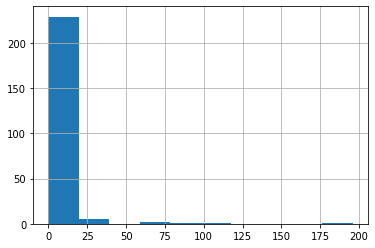

In [28]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count